In [24]:
# Imports 
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [39]:
# Data
rootdir = r'/media/mikapm/T7 Shield/ROXSI/Asilomar2022/SmallScaleArray'
outdir = '/home/mikapm/Github/REEF3D/Simulations/asilomar_test'
# Bathymetry
bathydir = os.path.join(rootdir, 'Bathy')
fn_bathy = os.path.join(bathydir, 'Asilomar_2022_SSA_bathy_updated_50cm.nc')
dsb = xr.open_dataset(fn_bathy, decode_coords='all')
dsb

<xarray.Dataset>
Dimensions:  (y: 1601, x: 2101)
Coordinates:
  * x        (x) float64 -1e+03 -999.5 -999.0 -998.5 ... 48.5 49.0 49.5 50.0
  * y        (y) float64 -400.0 -399.5 -399.0 -398.5 ... 398.5 399.0 399.5 400.0
    lat      (y, x) float64 ...
    lon      (y, x) float64 ...
Data variables: (12/28)
    z_msl    (y, x) float64 ...
    C1       float64 ...
    C2       float64 ...
    C3       float64 ...
    C4       float64 ...
    C5       float64 ...
    ...       ...
    X09      float64 ...
    X10      float64 ...
    X11      float64 ...
    X12      float64 ...
    X13      float64 ...
    X14      float64 ...
Attributes: (12/14)
    title:                 ROXSI 2022 Asilomar small-scale array bathymetry d...
    summary:               Combined bathymetry for small-scale array site.
    source:                CSUMB, eTracMultibeam, eTracLidar, DiveJet, NOAALidar
    magnetic_declination:  12.86 degE
    reference_angle:       293 deg
    reference_latitude:    36.624032972222224
    ...                    ...
    feature_type:          bathymetry
    date_created:          2023-05-02 21:17:36.545787 UTC
    references:            https://github.com/mikapm/pyROXSI
    creator_name:          Mika P. Malila
    creator_email:         mikapm@unc.edu
    institution:           University of North Carolina at Chapel Hill

In [53]:
# Generate xyz .dat file from bathymetry
xyz = dsb.z_msl.to_dataframe().reset_index().drop(['lat', 'lon'], axis=1)
xyz = xyz[['x', 'y', 'z_msl']] # Change order of columns
# No negative coords or depths
xyz['x'] += 1000
xyz['y'] += 400
xyz['z_msl'] += abs(xyz['z_msl'].min())
# Save to .dat
xyz.to_csv(os.path.join(outdir, 'geo.dat'), index=False, header=False)
# For test plot in next cell
nx = 2101
ny = 1601
X = xyz['x'].values.reshape(ny,nx)
Y = xyz['y'].values.reshape(ny,nx)
Z = xyz['z_msl'].values.reshape(ny,nx)


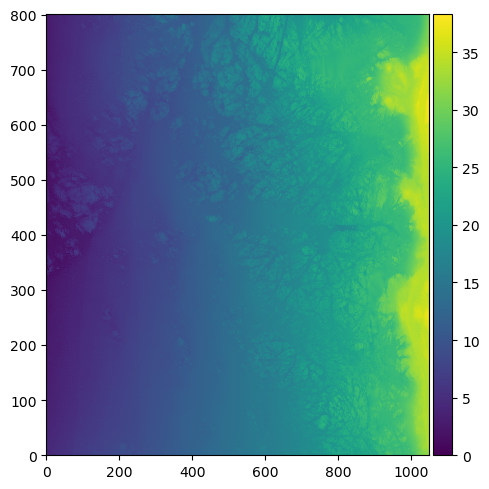

In [54]:
# Test plot
fig, ax = plt.subplots(figsize=(5,5))
grid = ax.pcolormesh(X, Y, Z)
# Colorbar on right
cax = ax.inset_axes([1.01, 0.00, 0.05, 1.0], transform=ax.transAxes)
cbar = fig.colorbar(grid, cax=cax)
plt.tight_layout()
plt.show()
